## Component Two

## Vehicle Damage Insurance Claim Verification

In [7]:
pip install tensorflow keras opencv-python matplotlib pandas numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Classifying Testing Images

In [120]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = pd.read_csv(r"C:/Users/123/OneDrive - hull.ac.uk/Understanding of AI/final assignment AI/data set task 2/train/train/train.csv")
test_data = pd.read_csv(r"C:/Users/123/OneDrive - hull.ac.uk/Understanding of AI/final assignment AI/data set task 2/test/test/test.csv")

train_images_dir = r"C:/Users/123/OneDrive - hull.ac.uk/Understanding of AI/final assignment AI/data set task 2/train/train/images"
test_images_dir = r"C:/Users/123/OneDrive - hull.ac.uk/Understanding of AI/final assignment AI/data set task 2/test/test/images"




label_mapping = {
    'crack': 0,
    'scratch': 1,
    'tire_flat': 2,
    'dent': 3,
    'glass_shatter': 4,
    'lamp_broken': 5
}

# Let's assume the first part of the filename (before the first underscore) refers to the category
# For example, 'crack_1.jpg', 'scratch_2.jpg', etc.
test_data['label'] = test_data['filename'].apply(lambda x: label_mapping.get(x.split('_')[0], -1))

# Check the result
print(test_data.head())

   image_id  filename  label
0      7201  7201.jpg     -1
1      7202  7202.jpg     -1
2      7203  7203.jpg     -1
3      7204  7204.jpg     -1
4      7205  7205.jpg     -1


### Checking Files names - Testing Data

In [118]:
import pandas as pd

# Load the train data CSV
train_data = pd.read_csv(r"C:/Users/123/OneDrive - hull.ac.uk/Understanding of AI/final assignment AI/data set task 2/train/train/train.csv")

# Display the first few rows
print(train_data.head())

# Ensure that 'filename' and 'label' columns are correct

   image_id filename  label
0         1    1.jpg      2
1         2    2.jpg      4
2         3    3.jpg      2
3         4    4.jpg      3
4         5    5.jpg      5


### Labelling Testing images

In [68]:
# Example: Manually assign labels based on the filename (adjust based on your logic)
label_mapping = {
    '7201': 0,  # Example: 0 = crack
    '7202': 1,  # Example: 1 = scratch
    '7203': 2,  # Example: 2 = tire_flat
    '7204': 3,  # Example: 3 = dent
    '7205': 4   # Example: 4 = glass_shatter
    # Add the rest as needed
}

# Assign labels based on the filename (you may adjust this based on your actual data)
test_data['label'] = test_data['filename'].apply(lambda x: label_mapping.get(x.split('.')[0], -1))

# Check the result
print(test_data.head())

   image_id  filename  label
0      7201  7201.jpg      0
1      7202  7202.jpg      1
2      7203  7203.jpg      2
3      7204  7204.jpg      3
4      7205  7205.jpg      4


### checking train images

In [116]:
import os

# Path to the train images directory
train_images_dir = r"C:/Users/123/OneDrive - hull.ac.uk/Understanding of AI/final assignment AI/data set task 2/train/train/images"


if not os.path.exists(train_images_dir):
    print(f"Directory {train_images_dir} does not exist!")
else:
    images_in_train_dir = os.listdir(train_images_dir)
    print(f"Found {len(images_in_train_dir)} images in the train images directory.")
    # List the first few files to confirm they exist
    print(images_in_train_dir[:10])

Found 7200 images in the train images directory.
['1.jpg', '10.jpg', '100.jpg', '1000.jpg', '1001.jpg', '1002.jpg', '1003.jpg', '1004.jpg', '1005.jpg', '1006.jpg']


### chekcing test images

In [114]:
import os

# Path to the train images directory
test_images_dir = r"C:/Users/123/OneDrive - hull.ac.uk/Understanding of AI/final assignment AI/data set task 2/test/test/images"


if not os.path.exists(test_images_dir):
    print(f"Directory {test_images_dir} does not exist!")
else:
    images_in_test_dir = os.listdir(test_images_dir)
    print(f"Found {len(images_in_test_dir)} images in the test images directory.")
    # List the first few files to confirm they exist
    print(images_in_test_dir[:10])

Found 4800 images in the test images directory.
['10000.jpg', '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg', '10005.jpg', '10006.jpg', '10007.jpg', '10008.jpg', '10009.jpg']


## Question A

In [34]:
print("TRAIN CSV columns:", train_data.columns.tolist())
print(train_data.head())

TRAIN CSV columns: ['image_id', 'filename', 'label']
   image_id filename  label
0         1    1.jpg      2
1         2    2.jpg      4
2         3    3.jpg      2
3         4    4.jpg      3
4         5    5.jpg      5


# Compiling CNN Model

TRAIN columns: ['image_id', 'filename', 'label']
   image_id filename  label
0         1    1.jpg      2
1         2    2.jpg      4
2         3    3.jpg      2
3         4    4.jpg      3
4         5    5.jpg      5 

TEST  columns: ['image_id', 'filename']
   image_id  filename
0      7201  7201.jpg
1      7202  7202.jpg
2      7203  7203.jpg
3      7204  7204.jpg
4      7205  7205.jpg 

Found 5760 validated image filenames belonging to 6 classes.
Found 1440 validated image filenames belonging to 6 classes.
Found 4800 validated image filenames.


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 15, 15, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,816,454 (26.00 MB)

 Trainable params: 6,815,494 (26.00 MB)

 Non-trainable params: 960 (3.75 KB)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3466 - auc: 0.6817 - loss: 4.1738 - precision: 0.3687 - recall: 0.2873
Epoch 1: val_accuracy improved from -inf to 0.32986, saving model to best_fraud_model.keras
180/180 ━━━━━━━━━━━━━━━━━━━━ 445s 2s/step - accuracy: 0.3467 - auc: 0.6819 - loss: 4.1653 - precision: 0.3689 - recall: 0.2870 - val_accuracy: 0.3299 - val_auc: 0.7123 - val_loss: 2.3595 - val_precision: 0.3396 - val_recall: 0.2021 - learning_rate: 0.0010
Epoch 2/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3984 - auc: 0.7830 - loss: 1.5003 - precision: 0.5087 - recall: 0.1837
Epoch 2: val_accuracy improved from 0.32986 to 0.33264, saving model to best_fraud_model.keras
180/180 ━━━━━━━━━━━━━━━━━━━━ 276s 2s/step - accuracy: 0.3984 - auc: 0.7830 - loss: 1.5002 - precision: 0.5088 - recall: 0.1836 - val_accuracy: 0.3326 - val_auc: 0.7399 - val_loss: 2.1277 - val_precision: 0.3457 - val_recall: 0.2854 - learning_rate: 0.0010
Epoch 3/20
180/180 ━━━━━━━━━━

   filename predicted_label
0  7201.jpg         scratch
1  7202.jpg            dent
2  7203.jpg         scratch
3  7204.jpg   glass_shatter
4  7205.jpg         scratch


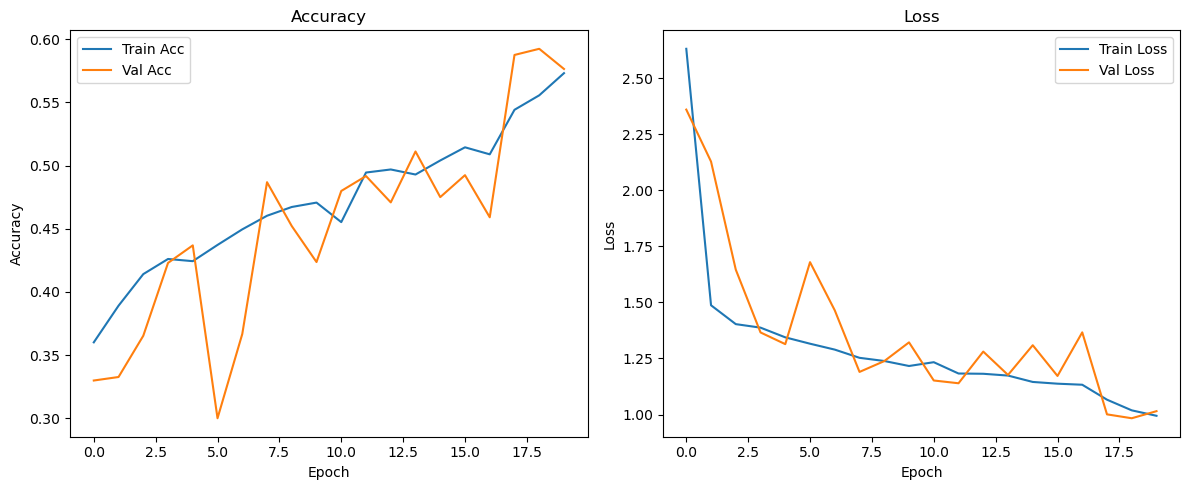

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np

# 1) Paths
train_csv     = r"C:/Users/123/OneDrive - hull.ac.uk/Understanding of AI/final assignment AI/data set task 2/train/train/train.csv"
test_csv      = r"C:/Users/123/OneDrive - hull.ac.uk/Understanding of AI/final assignment AI/data set task 2/test/test/test.csv"
train_img_dir = r"C:/Users/123/OneDrive - hull.ac.uk/Understanding of AI/final assignment AI/data set task 2/train/train/images"
test_img_dir  = r"C:/Users/123/OneDrive - hull.ac.uk/Understanding of AI/final assignment AI/data set task 2/test/test/images"

# 2) Read CSVs into DataFrames
train_df = pd.read_csv(train_csv)
test_df  = pd.read_csv(test_csv)

# 3) Inspect (optional)
print("TRAIN columns:", train_df.columns.tolist())
print(train_df.head(), "\n")
print("TEST  columns:",  test_df.columns.tolist())
print(test_df.head(), "\n")

# 4) Map numeric → string classes (train only)
label_mapping = {
    1: 'crack',
    2: 'scratch',
    3: 'tire_flat',
    4: 'dent',
    5: 'glass_shatter',
    6: 'lamp_broken'
}
train_df['label'] = train_df['label'].map(label_mapping)

# 5) Build filepaths
train_df['filepath'] = train_df['filename'].apply(lambda fn: os.path.join(train_img_dir, fn))
test_df ['filepath'] = test_df ['filename'].apply(lambda fn: os.path.join(test_img_dir, fn))

# 6) Split into train / val
train_df, val_df = train_test_split(
    train_df, test_size=0.2, stratify=train_df['label'], random_state=42
)

# 7) Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_dataframe(
    train_df, x_col='filepath', y_col='label',
    target_size=(150,150), batch_size=32, class_mode='categorical'
)
val_gen = train_datagen.flow_from_dataframe(
    val_df, x_col='filepath', y_col='label',
    target_size=(150,150), batch_size=32, class_mode='categorical'
)

# 8) Test generator
if 'label' in test_df.columns:
    test_df['label'] = test_df['label'].map(label_mapping)
    test_gen = test_datagen.flow_from_dataframe(
        test_df, x_col='filepath', y_col='label',
        target_size=(150,150), batch_size=32, class_mode='categorical', shuffle=False
    )
else:
    test_gen = test_datagen.flow_from_dataframe(
        test_df, x_col='filepath', y_col=None,
        target_size=(150,150), batch_size=32, class_mode=None, shuffle=False
    )

# 9) Determine number of classes
num_classes = len(train_gen.class_indices)

# 10) Build the CNN
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128,(3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256,(3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# 11) Compile model with metrics
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

# 12) Callbacks
checkpoint = ModelCheckpoint(
    'best_fraud_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    verbose=1,
    min_lr=1e-6
)

model.summary()

# 13) Train
history = model.fit(
    train_gen,
    epochs=20,
    validation_data=val_gen,
    callbacks=[checkpoint, early_stopping, lr_scheduler]
)

# 14) Evaluate or predict
if 'label' in test_df.columns:
    loss, acc = model.evaluate(test_gen)
    print(f"\nTest Accuracy: {acc:.4f}")
else:
    preds = model.predict(test_gen)
    idxs = np.argmax(preds, axis=1)
    labels = {v:k for k,v in train_gen.class_indices.items()}
    test_df['predicted_label'] = [labels[i] for i in idxs]
    print(test_df[['filename','predicted_label']].head())

# 15) Save & plot
model.save("vehicle_damage_classifier.h5")

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss'); plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()

plt.tight_layout()
plt.show()

## Saving Figures/Graphs

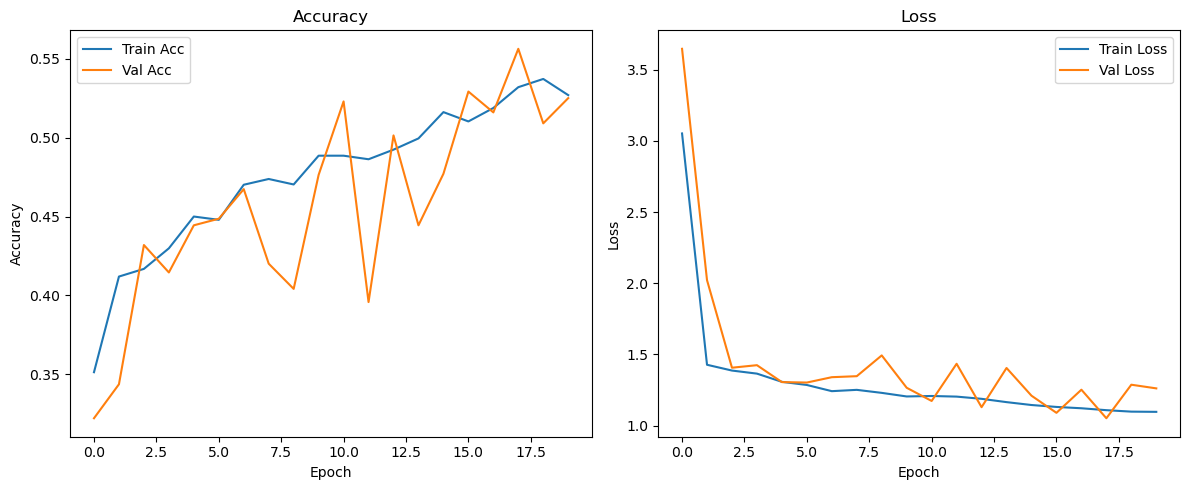

In [14]:
# Save the accuracy and loss plots
plt.figure(figsize=(12,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss'); plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()

plt.tight_layout()

# Save the figure
plt.savefig('training_plots.png')  # Save as PNG, or you can choose .jpg, .pdf, etc.
plt.show()

### Creating Path for classifying images - Train folder

In [20]:
for label in label_mapping.values():
    os.makedirs(os.path.join(organized_dir, label), exist_ok=True)


### Move Train Images into defined classs Folders - 6 Classes

In [6]:
import os
import shutil
import pandas as pd

# Paths
train_csv     = r"C:/Users/123/OneDrive - hull.ac.uk/Understanding of AI/final assignment AI/data set task 2/train/train/train.csv"
train_img_dir = r"C:/Users/123/OneDrive - hull.ac.uk/Understanding of AI/final assignment AI/data set task 2/train/train/images"
organized_dir = r"C:/Users/123/OneDrive - hull.ac.uk/Understanding of AI/final assignment AI/data set task 2/train/organized_train"

# Read CSV
train_df = pd.read_csv(train_csv)
label_mapping = {1: 'crack', 2: 'scratch', 3: 'tire_flat', 4: 'dent', 5: 'glass_shatter', 6: 'lamp_broken'}
train_df['label'] = train_df['label'].map(label_mapping)

# Create folders
for label in label_mapping.values():
    os.makedirs(os.path.join(organized_dir, label), exist_ok=True)

# Move images
for idx, row in train_df.iterrows():
    src = os.path.join(train_img_dir, row['filename'])
    dst = os.path.join(organized_dir, row['label'], row['filename'])
    shutil.copy(src, dst)

print("Finished moving images into class folders.")

Finished moving images into class folders.


### Count of classified Train images

In [18]:
import os
import shutil
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # important: split into train and val
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = train_datagen.flow_from_directory(
    organized_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='training'   # training set
)

val_gen = train_datagen.flow_from_directory(
    organized_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='validation' # validation set
)

# For training set
train_classes, train_counts = np.unique(train_gen.classes, return_counts=True)
print("Training class counts:")
for cls, count in zip(train_classes, train_counts):
    class_label = list(train_gen.class_indices.keys())[cls]
    print(f"{class_label}: {count}")

# For validation set
val_classes, val_counts = np.unique(val_gen.classes, return_counts=True)
print("\nValidation class counts:")
for cls, count in zip(val_classes, val_counts):
    class_label = list(val_gen.class_indices.keys())[cls]
    print(f"{class_label}: {count}")

Found 5763 images belonging to 6 classes.
Found 1437 images belonging to 6 classes.
Training class counts:
crack: 137
dent: 1664
glass_shatter: 948
lamp_broken: 706
scratch: 1880
tire_flat: 428

Validation class counts:
crack: 34
dent: 415
glass_shatter: 237
lamp_broken: 176
scratch: 469
tire_flat: 106


### creating folder for classified Test images - 4800 count

In [129]:
# Paths
test_csv     = r"C:/Users/123/OneDrive - hull.ac.uk/Understanding of AI/final assignment AI/data set task 2/test/test/test.csv"
test_img_dir = r"C:/Users/123/OneDrive - hull.ac.uk/Understanding of AI/final assignment AI/data set task 2/test/test/images"
organized_test_dir = r"C:/Users/123/OneDrive - hull.ac.uk/Understanding of AI/final assignment AI/data set task 2/test/organized_test"

# Read CSV
test_df = pd.read_csv(test_csv)
label_mapping = {1: 'crack', 2: 'scratch', 3: 'tire_flat', 4: 'dent', 5: 'glass_shatter', 6: 'lamp_broken'}

if 'label' in test_df.columns:
    test_df['label'] = test_df['label'].map(label_mapping)

    # Create class folders
    for label in label_mapping.values():
        os.makedirs(os.path.join(organized_test_dir, label), exist_ok=True)

    # Move images
    for idx, row in test_df.iterrows():
        src = os.path.join(test_img_dir, row['filename'])
        dst = os.path.join(organized_test_dir, row['label'], row['filename'])
        shutil.copy(src, dst)

    print("Finished moving TEST images into class folders.")
else:
    # If test has NO labels
    unknown_folder = os.path.join(organized_test_dir, 'unknown')
    os.makedirs(unknown_folder, exist_ok=True)

    for filename in os.listdir(test_img_dir):
        src = os.path.join(test_img_dir, filename)
        dst = os.path.join(unknown_folder, filename)
        shutil.copy(src, dst)

    print("Finished moving TEST images into 'unknown' folder.")

Finished moving TEST images into 'unknown' folder.


In [8]:
import os
import shutil
import pandas as pd

# Paths
test_csv = r"C:/Users/123/OneDrive - hull.ac.uk/Understanding of AI/final assignment AI/data set task 2/test/test/test.csv"
test_img_dir = r"C:/Users/123/OneDrive - hull.ac.uk/Understanding of AI/final assignment AI/data set task 2/test/test/images"
organized_dir = r"C:/Users/123/OneDrive - hull.ac.uk/Understanding of AI/final assignment AI/data set task 2/test/organized_predicted"

# Read CSV
test_df = pd.read_csv(test_csv)

# Mapping from first digit to label
label_mapping = {
    1: 'crack',
    2: 'scratch',
    3: 'tire_flat',
    4: 'dent',
    5: 'glass_shatter',
    6: 'lamp_broken'
}

# Function to safely map
def get_label(filename):
    try:
        return label_mapping[int(filename[0])]
    except KeyError:
        return None

# Apply mapping
test_df['label'] = test_df['filename'].apply(get_label)

# Drop rows where label is None (invalid)
test_df = test_df.dropna(subset=['label'])

# Create folders
for label in label_mapping.values():
    os.makedirs(os.path.join(organized_dir, label), exist_ok=True)

# Move images
for idx, row in test_df.iterrows():
    src = os.path.join(test_img_dir, row['filename'])
    dst = os.path.join(organized_dir, row['label'], row['filename'])

    if os.path.exists(src):
        shutil.copy(src, dst)
    else:
        print(f"File not found: {src}")

print("Finished moving images into class folders.")

Finished moving images into class folders.
